In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn import model_selection
from sklearn import datasets
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
from create_dataset import create_bunch_classification

## handeling the dataset

In [2]:

bcd = create_bunch_classification() # bcd stands for breast cancer dataset
print(f"Keys of code metrics  Dataset: {bcd.keys()}")


Keys of code metrics  Dataset: dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [3]:
bcd.data

array([[15.        ,  0.        , 30.5625    , ...,  0.        ,
         1.        ,  3.        ],
       [29.        ,  0.        , 45.        , ...,  0.        ,
         4.        ,  3.        ],
       [32.        ,  0.        , 53.81818182, ...,  0.        ,
         1.        ,  2.        ],
       ...,
       [30.        ,  1.        , 45.19230769, ...,  2.        ,
         2.        ,  2.        ],
       [10.        ,  1.        , 47.        , ...,  2.        ,
         1.        ,  3.        ],
       [10.        ,  0.        , 39.375     , ...,  2.        ,
         1.        ,  0.        ]])

In [4]:
bcd.target

['très lisible',
 'plutôt lisible',
 'plutôt lisible',
 'très lisible',
 'très lisible',
 'très lisible',
 'plutôt lisible',
 'plutôt lisible',
 'plutôt lisible',
 'plutôt lisible',
 'très lisible',
 'plutôt lisible',
 'plutôt lisible',
 'plutôt lisible',
 'très peu lisible',
 'très lisible',
 'plutôt lisible',
 'très lisible',
 'très lisible',
 'plutôt lisible',
 'très lisible',
 'très lisible',
 'plutôt lisible',
 'plutôt lisible',
 'très lisible',
 'plutôt lisible',
 'plutôt lisible',
 'très peu lisible',
 'plutôt lisible',
 'plutôt lisible',
 'plutôt lisible',
 'très lisible',
 'très lisible',
 'très peu lisible',
 'très lisible',
 'très peu lisible',
 'plutôt lisible',
 'très lisible',
 'très lisible',
 'très lisible',
 'très lisible',
 'très lisible',
 'très peu lisible',
 'très lisible',
 'très lisible',
 'plutôt lisible',
 'plutôt lisible',
 'très lisible',
 'très peu lisible',
 'plutôt lisible',
 'plutôt lisible',
 'très lisible',
 'très lisible',
 'très lisible',
 'très lisib

In [5]:
bcd.feature_names

array(['number of lines', 'number of Loops', 'Lines length mean',
       'Lines length max', 'comments line per code line',
       'Proportion of Blank Lines', 'Identifiers length (characters)',
       'Max streak of opening parentheses before a closing one',
       'Max streak periods'], dtype='<U54')

In [6]:
len(np.unique(bcd.target))

3

In [18]:
# X -> features, y -> label
X = bcd.data
y = bcd.target 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bcd.data, bcd.target, test_size=0.20)


## loading models 

## DecisionTrees

In [19]:
clg_DT = DecisionTreeClassifier(random_state=1)
clg_DT.fit(X_train ,y_train)

y_pred_dt =clg_DT.predict(X_test)

accuracy_DT = clg_DT.score(X_test,y_test)
kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=12345)
cv_results = model_selection.cross_validate(clg_DT, X_train, y_train, cv=kfold , scoring = 'accuracy')
accuracy_DT_cross = np.mean(cv_results['test_score'])

# Print the results
print("Decision Tree accuracy on test set: {:.3f}".format(accuracy_DT))
print("Decision Tree cross-validation accuracy: {:.3f}".format(accuracy_DT_cross))




Decision Tree accuracy on test set: 0.500
Decision Tree cross-validation accuracy: 0.540


## CONFUSION MATRIX AND FEATURE IMPORTANCE FOR Decision tree


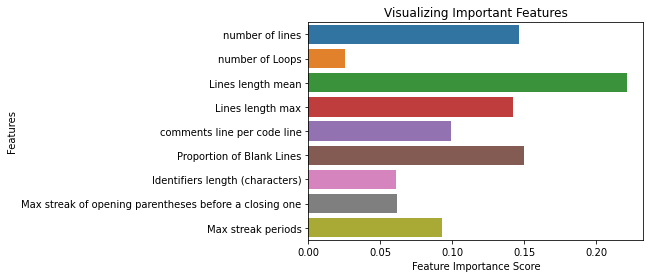

In [20]:
importance_DT = clg_DT.feature_importances_
# Create a barplot of feature importances
sns.barplot(x=importance_DT, y=bcd.feature_names)

# Add labels and title
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()


Confusion Matrix - decision tree :


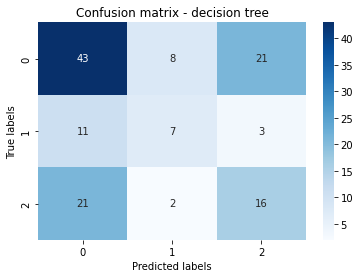

In [21]:
# Generate confusion matrix
cm_dt= confusion_matrix(y_test, y_pred_dt)

# Print confusion matrix
print("Confusion Matrix - decision tree :")
sns.heatmap(cm_dt, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix - decision tree')
plt.show()

## LogisticRegression 

In [22]:

# Create Logistic Regression classifier
clg_lr = LogisticRegression(max_iter=1000, solver='saga', multi_class='multinomial')

# Fit the classifier to the data
clg_lr.fit(X_train,y_train)

# Predict on the test set
lr_preds = clg_lr.predict(X_test)

# Calculate accuracy
accuracy_lr = clg_lr.score(X_test,y_test)

# Calculate cross-validation accuracy
kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=12345)
cv_results = model_selection.cross_validate(clg_lr, X_train, y_train, cv=kfold , scoring = 'accuracy')
accuracy_lr_cross = np.mean(cv_results['test_score'])

# Print the results
print("Logistic Regression accuracy on test set: {:.3f}".format(accuracy_lr))
print("Logistic Regression cross-validation accuracy: {:.3f}".format(accuracy_lr_cross))


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The m

Logistic Regression accuracy on test set: 0.614
Logistic Regression cross-validation accuracy: 0.614


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## Randomforest

In [23]:
clf_rf = RandomForestClassifier(n_estimators=100, random_state=12345)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)

accuracy_rf = clf_rf.score(X_test, y_test)
cv_results_rf = model_selection.cross_validate(clf_rf, X_train, y_train, cv=kfold, scoring='balanced_accuracy')
accuracy_rf_cross = np.mean(cv_results_rf['test_score'])

# Print the results
print("Random Forest accuracy on test set: {:.3f}".format(accuracy_rf))
print("Random Forest cross-validation accuracy: {:.3f}".format(accuracy_rf_cross))



Random Forest accuracy on test set: 0.667
Random Forest cross-validation accuracy: 0.507


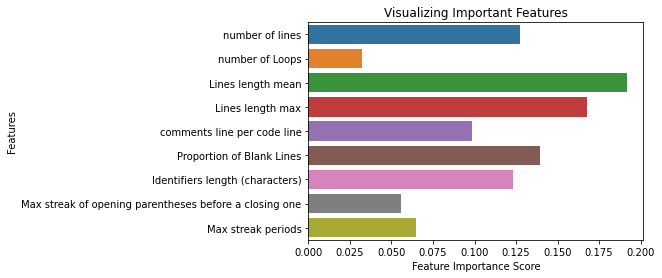

In [24]:
importance_rf = clf_rf.feature_importances_
# Create a barplot of feature importances
sns.barplot(x=importance_rf, y=bcd.feature_names)

# Add labels and title
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

Confusion Matrix - random forest :


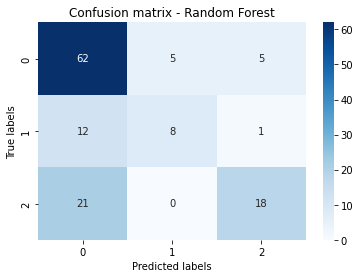

In [25]:


# Generate confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Print confusion matrix
print("Confusion Matrix - random forest :")
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix - Random Forest')
plt.show()

## K nearest neighbors

In [26]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier
knn_clf = KNeighborsClassifier()

# Fit the classifier to the data
knn_clf.fit(X_train, y_train)

# Predict on the test set
knn_preds = knn_clf.predict(X_test)

# Calculate accuracy
knn_accuracy = knn_clf.score(X_test, y_test)

# Calculate cross-validation accuracy
kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=12345)
cv_results = model_selection.cross_validate(knn_clf, X_train, y_train, cv=kfold , scoring = 'accuracy')
knn_accuracy_cross = np.mean(cv_results['test_score'])

# Print results
print("KNN accuracy on test set: {:.3f}".format(knn_accuracy))
print("KNN cross-validation accuracy: {:.3f}".format(knn_accuracy_cross))



KNN accuracy on test set: 0.561
KNN cross-validation accuracy: 0.606


## Neurol network

In [30]:

from sklearn.preprocessing import StandardScaler
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(bcd.data, bcd.target, test_size=0.2, random_state=12345)

# Scale the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Create a label encoder
label_encoder = LabelEncoder()

# Encode the target variable as integers
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Convert the target variable to a one-hot encoded representation
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build the neural network model
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(12, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(np.unique(bcd.target)), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=2, batch_size=10, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Neural Network accuracy on test set: {:.3f}".format(accuracy))




Epoch 1/2
53/53 [==============================] - 1s 5ms/step - loss: 1.1283 - accuracy: 0.4716 - val_loss: 1.0014 - val_accuracy: 0.5833
Epoch 2/2
5/5 [==============================] - 0s 2ms/step - loss: 0.9689 - accuracy: 0.5682
Neural Network accuracy on test set: 0.568


5/5 [==============================] - 0s 2ms/step
Confusion Matrix - neurol networks :


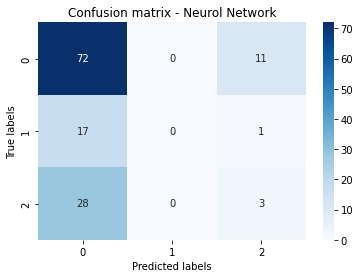

In [31]:
from sklearn.metrics import confusion_matrix

# Generate predictions on the test set
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Generate confusion matrix
cm_nn = confusion_matrix(y_test.argmax(axis=1), y_pred)

# Print confusion matrix
# Print confusion matrix
print("Confusion Matrix - neurol networks :")
sns.heatmap(cm_nn, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix - Neurol Network')
plt.show()